In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from model.model import run_model_sc, run_model
import matplotlib.pyplot as plt

/Users/kudot3/Paper/hifppar/model/model.py:26: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def ppar_model(ds, t, R, e0=1, over=None, kd=None, timing=0):


In [2]:
mol = dict(ppar=0, cebp=1, hif=2, lipid=3)
timepoint = -1

<AxesSubplot:>

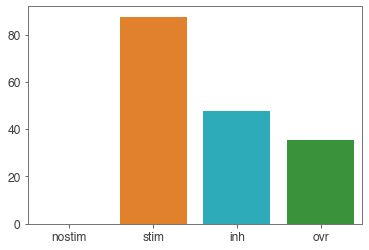

In [3]:
d = {}
d['nostim'] = run_model_sc(0.001, trials=1000)[timepoint, mol['lipid'], :].mean()
d['stim'] = run_model_sc(.25, trials=1000)[timepoint, mol['lipid'], :].mean()
d['inh'] = run_model_sc(.25, kd=-0.5, trials=1000)[timepoint, mol['lipid'], :].mean()
d['ovr'] = run_model_sc(.25, over=1.0, trials=1000)[timepoint, mol['lipid'], :].mean()
sns.barplot(data=pd.DataFrame(pd.Series(d)).T)

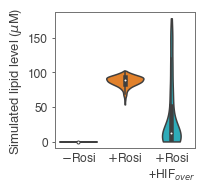

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5))

s0 = run_model_sc(0.001, trials=500, over=0, timing=0)[timepoint, mol['lipid']]
s1 = run_model_sc(0.25, trials=500, over=0, timing=0)[timepoint, mol['lipid']]
s2 = run_model_sc(0.25, trials=250, over=1.0, timing=0)[timepoint, mol['lipid']]
sns.violinplot(data=[s0, s1, s2], cut=0, scale='count')
ax.set_ylabel('Simulated lipid level ($\mu$M)', fontsize=13)
ax.set_xticklabels(['$-$Rosi', '$+$Rosi', '$+$Rosi\n+HIF$_{over}$'], horizontalalignment='center', fontsize=12)
ax.tick_params(axis='x', length=0)

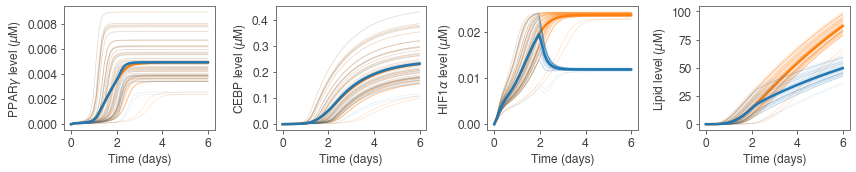

In [5]:
t = np.linspace(0, 6, 50)
fig, ax = plt.subplots(1, 4, figsize=(12, 2.5))
re = run_model_sc(0.25, trials=50, over=0, timing=0)
reh = run_model_sc(0.25, trials=50, kd=-0.5, timing=48)

for i, c in enumerate((0, 1, 2, 3)):
    ax[i].plot(t, re[:, c], alpha=0.2, color='tab:orange', linewidth=0.75);
    ax[i].plot(t, np.mean(re[:, c], axis=1), color='tab:orange', linewidth=2.5);
    ax[i].plot(t, reh[:, c], alpha=0.1, color='tab:blue', linewidth=0.75);
    ax[i].plot(t, np.mean(reh[:, c], axis=1), color='tab:blue', linewidth=2.5);

    ax[i].set_xlabel('Time (days)', fontsize=12)
ax[0].set_ylabel(r'PPAR$\gamma$ level ($\mu$M)', fontsize=12)
ax[1].set_ylabel(r'CEBP level ($\mu$M)', fontsize=12)
ax[2].set_ylabel(r'HIF1$\alpha$ level ($\mu$M)', fontsize=12)
ax[3].set_ylabel(r'Lipid level ($\mu$M)', fontsize=12)
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()